In [57]:
datapath = 'G:\\Shared drives\\Labber\\Data\\2023\\02\\Data_0223\\'
f_name = 'diss08_07A_FFLSpectroscopy_powerSweeps_7.hdf5'
f = h5py.File(datapath + f_name,'r')
f['Step config'].keys()

<KeysViewHDF5 ['1000334C - Power', 'Agilent Network Analyzer - Output power', 'Vaunix Lab Brick Digital Attenuator - Attenuation']>

In [58]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import sys
from fitTools.Resonator import Resonator

    
datapath = 'G:\\Shared drives\\Labber\\Data\\2023\\02\\Data_0223\\'
f_name = 'diss08_07A_FFLSpectroscopy_powerSweeps_7.hdf5'
f = h5py.File(datapath + f_name,'r')

s21 = f['Traces']['Agilent Network Analyzer - S21'][()]
numsteps = f['Traces']['Agilent Network Analyzer - S21_N'][0][()]
frange = f['Traces']['Agilent Network Analyzer - S21_t0dt'][0][()]
freqs = np.linspace(frange[0],frange[0]+frange[1]*(numsteps-1),numsteps)

s21_complex = s21[:,0,:]+1j*s21[:,1,:]
print(np.shape(s21_complex))
#s21_complex2 = s21_complex[:,0]
#print(s21_complex)
#print(np.shape(s21_complex))
#print(np.shape(freqs))
#plt.plot(freqs,abs(s21_complex))
#plt.figure()
#plt.plot(freqs,abs(s21_complex2))
#plt.show()
power_drive = np.linspace(0,50,51)
print(np.size(power_drive))

(301, 1938)
51


In [40]:

#first row: Q
#second row: Internal Q
#third row: Coupling Q
qvals = np.zeros((np.size(fdrive),3))
print(np.shape(qvals))

for i in range(np.size(fdrive)): 
    res = Resonator(port_type='notch',f_data=freqs,z_data=s21_complex[:,i])
    res.autofit()
    #res.show()
    qvals[i,0] = res.Q
    qvals[i,1] = res.Qi
    qvals[i,2] = res.Qc


(201, 3)


C:\Users\LFL\Anaconda3\envs\opx-env2\lib\site-packages\scipy\optimize\minpack.py:476: RuntimeWarning: Number of calls to function has reached maxfev = 200.
  warnings.warn(errors[info][0], RuntimeWarning)


Text(0, 0.5, 'Coupling Q')

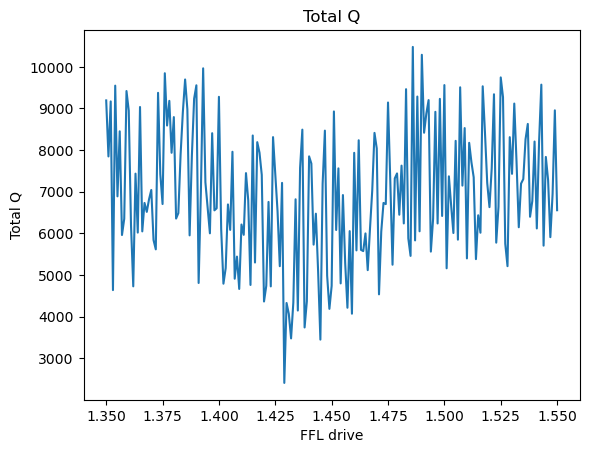

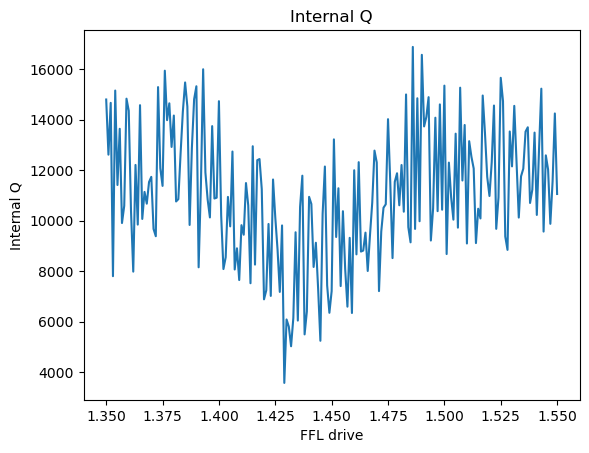

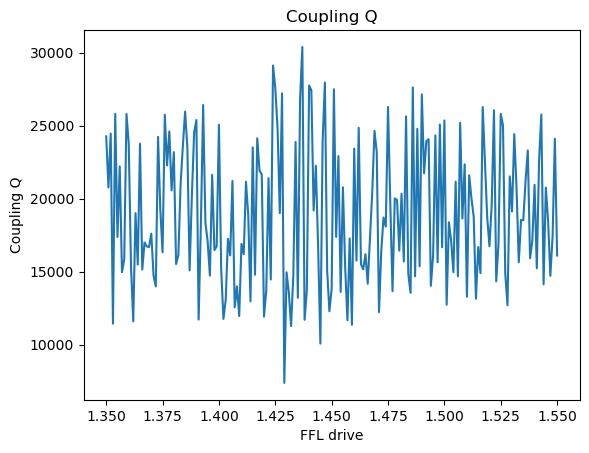

In [41]:
plt.plot(fdrive,qvals[:,0])
plt.title('Total Q')
plt.xlabel('FFL drive')
plt.ylabel('Total Q')
plt.figure()
plt.plot(fdrive,qvals[:,1])
plt.title('Internal Q')
plt.xlabel('FFL drive')
plt.ylabel('Internal Q')
plt.figure()
plt.plot(fdrive,qvals[:,2])
plt.title('Coupling Q')
plt.xlabel('FFL drive')
plt.ylabel('Coupling Q')